# Introduction to Qiskit

In [1]:
from qiskit import QuantumCircuit

## Create Quantum Circuit

qiskit.QuantumCircuit is the foundational building block of the qiskit library and will be used to design the Quantum Circuits.


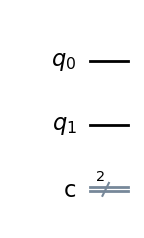

In [2]:
# Create a circuit with 2 qubits and 2 classical bits. Initialized to 0.
circuit = QuantumCircuit(2, 2)

# Use MatPlotLib backend to draw circuits
circuit.draw(output='mpl')

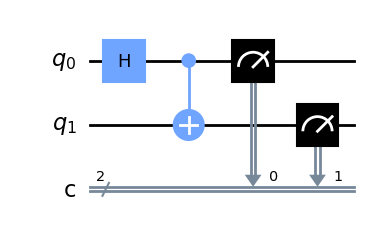

In [3]:
# Add a Hadamard gate on qubit 0
circuit.h(0)

# Add a Controlled-Not (CNOT) gate connecting qubits 0 (control) to 1 (target)
circuit.cx(0, 1)

# Measure quantum bit(s) into classical bit(s)
circuit.measure([0,1], [0,1])
# First list specifies order of qubits
# Second list specifies order of classical bits

circuit.draw(output='mpl')

## Simulate Quantum Circuit with QasmSimulator

qiskit.transpile is a function that converts a quantum circuit and to low-level QASM instructions optimized for the backend.
It essentially converts the given set of gate operations into another set that is optimized for a specific algorithm and backend.

qiskit_aer.QasmSimulator is the main Qiskit AER backend to simulate the noise models of Quantum Circuit.
It is especially useful for circuits that measure Qubits into Bits.

In [4]:
from qiskit import transpile
from qiskit_aer import QasmSimulator
from qiskit.visualization import plot_histogram

In [5]:
# Initialize a QASM simulator
simulator = QasmSimulator()

# Transpile circuit to simulator
compiled_circuit = transpile(circuit, simulator)

In [6]:
# Run simulation
job = simulator.run(compiled_circuit, shots=1000)

# Get result
result = job.result()

# Get the counts of each result
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)


Total count for 00 and 11 are: {'11': 490, '00': 510}


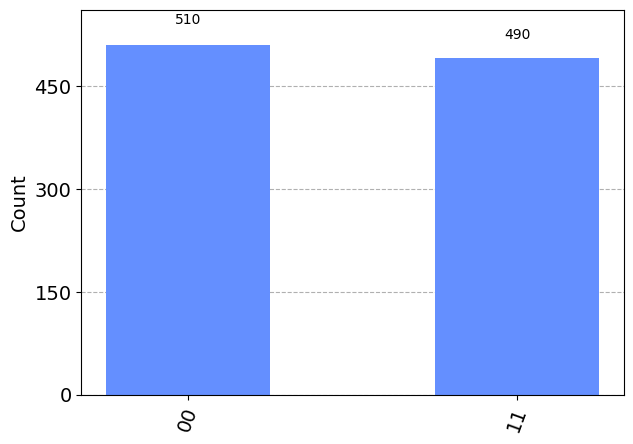

In [7]:
plot_histogram(counts)

**Note: Running this simulation multiple times may not yield the same results.**

This is because Quantum Systems are really sensitive to noise.
2 common sources of noise are: **gate-infidelity** and **decoherence**.

## More Circuit Basics

In [8]:
circuit = QuantumCircuit(3)

In [9]:
circuit.h(0)
circuit.cx(0, 1)
circuit.cx(0, 2)

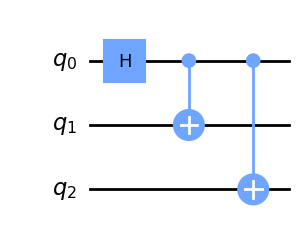

In [10]:
circuit.draw(output='mpl')

## Simulate Quantum Circuits with quantum_info

In [11]:
from qiskit.quantum_info import Operator, Statevector
from qiskit.visualization import array_to_latex, plot_state_city

In [12]:
# Initialize a StateVector with 2^(# Qubits) states
state = Statevector.from_int(0, 2**3)

# Evolve the state vector with the quantum circuit
state = state.evolve(circuit)

In [13]:
# Draw the state vector
state.draw('latex')

<IPython.core.display.Latex object>

In [14]:
# Represent the state vector as an array
array_to_latex(state)

<IPython.core.display.Latex object>

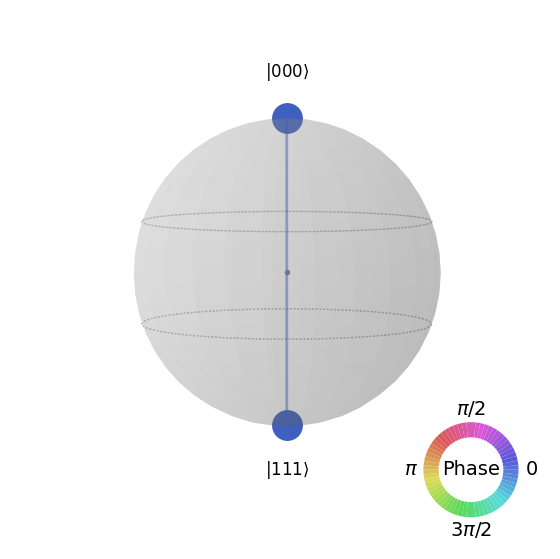

In [15]:
# Draw the state vector as a Q-Sphere
# Note: It is similar but not exactly a Bloch Sphere
state.draw('qsphere')

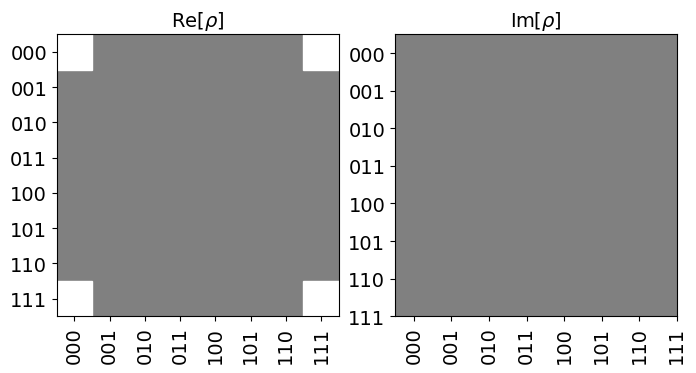

In [16]:
# Draw the real and imaginary state density matrix
state.draw('hinton')

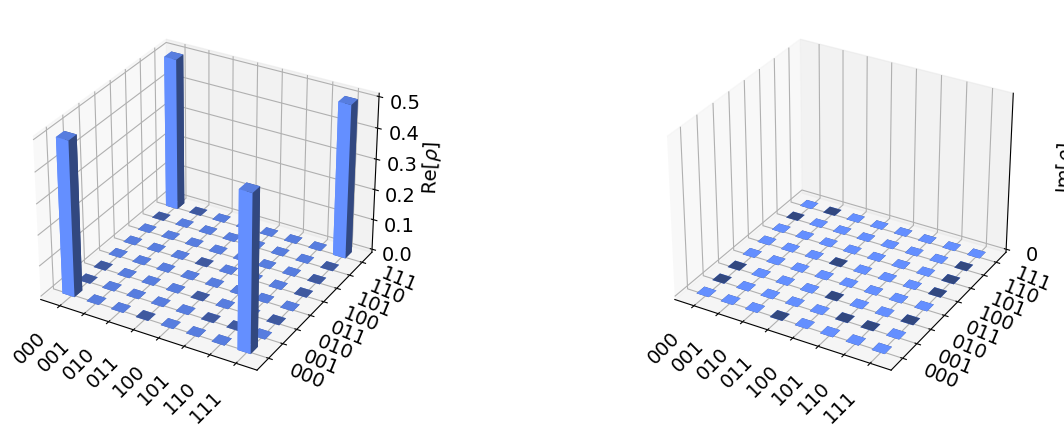

In [17]:
# Draw the real and imaginary state density matrix in 3D
plot_state_city(state)

In [18]:
# Unitary representation of the circuit
U = Operator(circuit)
U.data

array([[ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.70710678+0.j, -0.70710678+0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
         0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j, -0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j,  0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
        -0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.      

## Simulation with OpenQASM Backend

In [19]:
ms = QuantumCircuit(3, 3)

# Create a visual barrier (dotted vertical line)
ms.barrier(range(3))

# Create measure components
ms.measure(range(3), range(3))

In [20]:
# Merge circuits with compose
qc = ms.compose(circuit, range(3), front=True)
# This creates a circuit 'qc' with 'circuit' followed by 'ms'

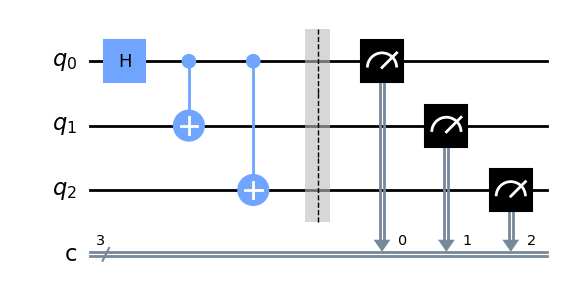

In [21]:
qc.draw('mpl')

### Simulation with AerSimulator

In [22]:
from qiskit_aer import AerSimulator

In [23]:
# Create a simulator instance
backend = AerSimulator()

# Convert to low-level QASM instructions
qc_compiled = transpile(qc, backend)

In [24]:
# Run simulation 1024 times
sim = backend.run(qc_compiled, shots=1024)

# Get results
results = sim.result()

In [25]:
counts = results.get_counts(qc_compiled)
print(counts)

{'111': 546, '000': 478}


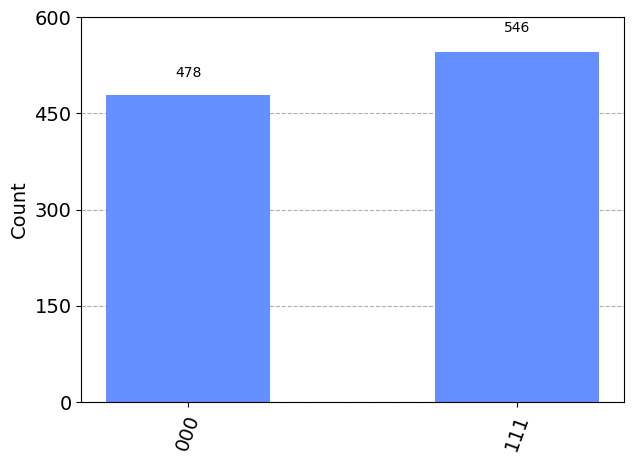

In [26]:
plot_histogram(counts)